In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("data/heart_attack_prediction_indonesia.csv")  
print(df.shape)
df.head()

(158355, 28)


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,158355.0,54.543778,11.910897,25.0,46.000000,55.000000,63.00000,90.0
gender,158355.0,0.519358,0.499627,0.0,0.000000,1.000000,1.00000,1.0
region,158355.0,0.650677,0.476758,0.0,0.000000,1.000000,1.00000,1.0
hypertension,158355.0,0.299069,0.457851,0.0,0.000000,0.000000,1.00000,1.0
diabetes,158355.0,0.199804,0.399854,0.0,0.000000,0.000000,0.00000,1.0
cholesterol_level,158355.0,199.533264,39.737565,100.0,172.000000,199.000000,226.00000,350.0
obesity,158355.0,0.249901,0.432957,0.0,0.000000,0.000000,0.00000,1.0
waist_circumference,158355.0,93.268504,16.382205,20.0,82.000000,93.000000,104.00000,173.0
family_history,158355.0,0.300218,0.458354,0.0,0.000000,0.000000,1.00000,1.0
sleep_hours,158355.0,6.480064,1.425398,3.0,5.492985,6.507461,7.52064,9.0


In [5]:
print(df.isnull().sum())

age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


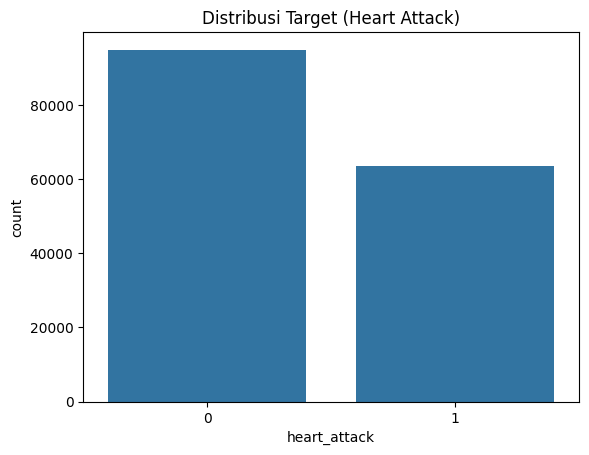

Proporsi Target:
heart_attack
0    0.598996
1    0.401004
Name: proportion, dtype: float64


In [6]:
sns.countplot(x="heart_attack", data=df)
plt.title("Distribusi Target (Heart Attack)")
plt.show()

print("Proporsi Target:")
print(df["heart_attack"].value_counts(normalize=True))


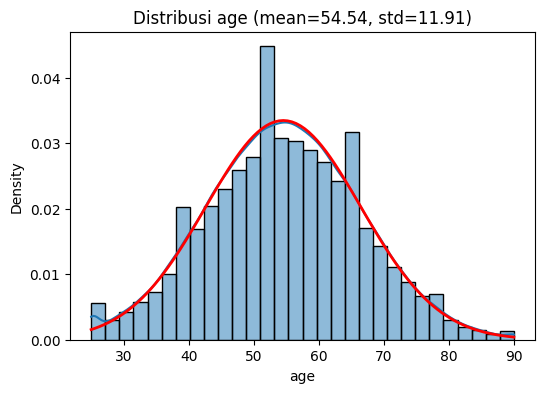

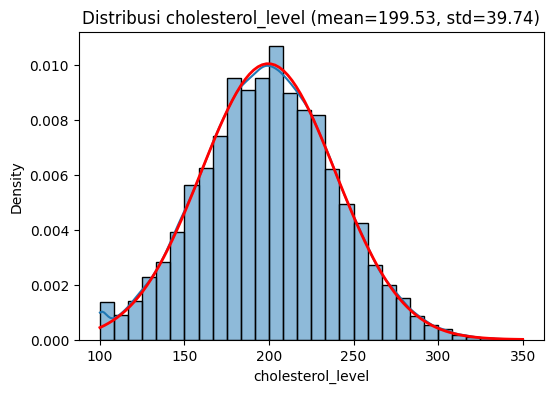

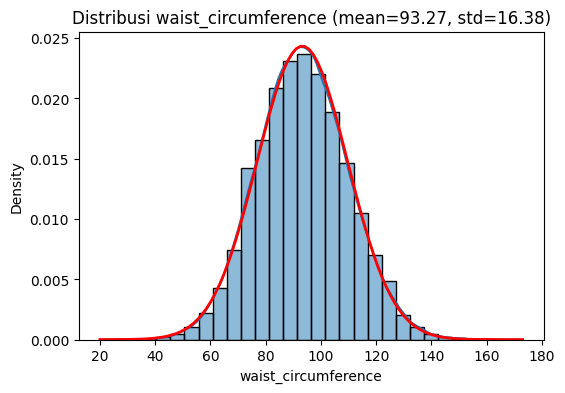

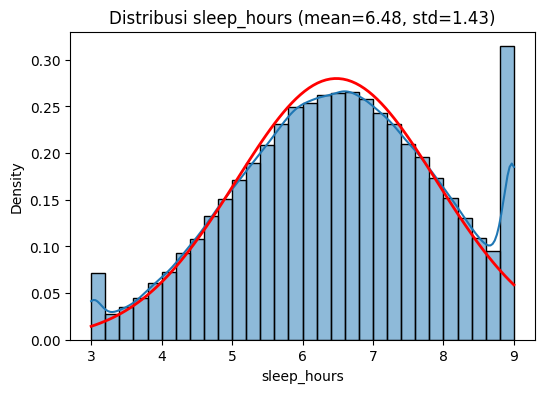

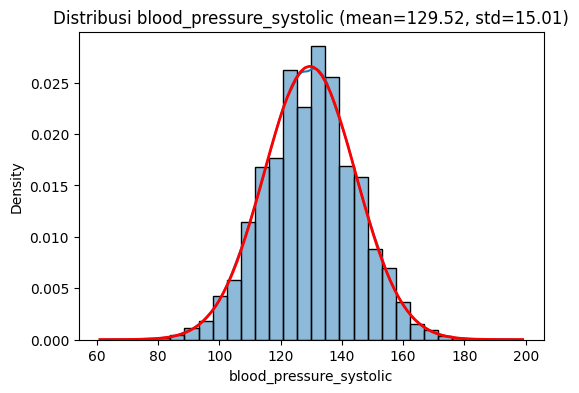

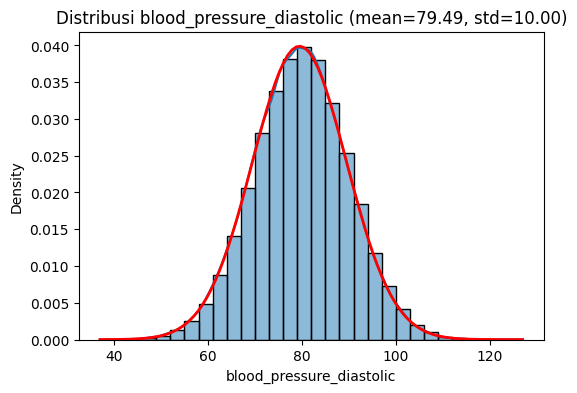

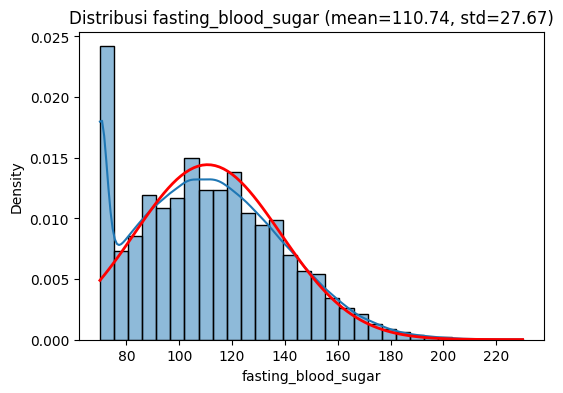

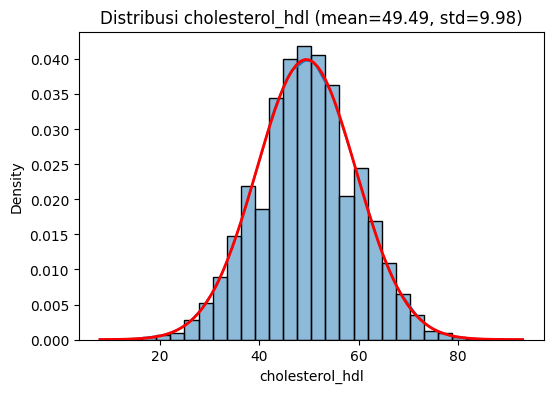

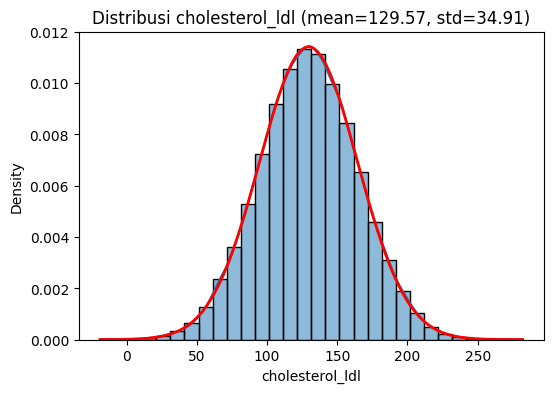

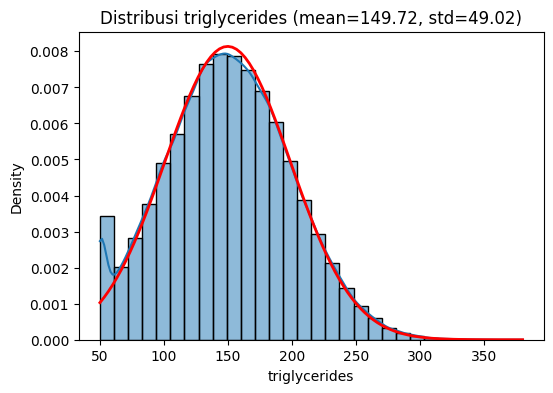

In [7]:
numerik = ["age", "cholesterol_level", "waist_circumference", "sleep_hours", 
            "blood_pressure_systolic", "blood_pressure_diastolic", 
            "fasting_blood_sugar", "cholesterol_hdl", "cholesterol_ldl", "triglycerides"]

for col in numerik:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, stat="density")

    mu, sigma = df[col].mean(), df[col].std()
    x = np.linspace(df[col].min(), df[col].max(), 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), "r", lw=2)

    plt.title(f"Distribusi {col} (mean={mu:.2f}, std={sigma:.2f})")
    plt.show()


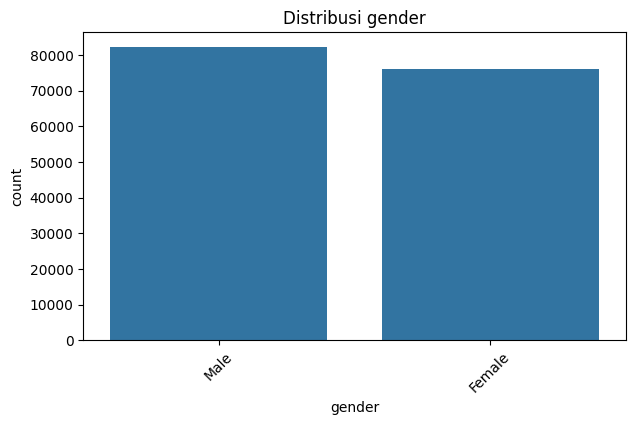

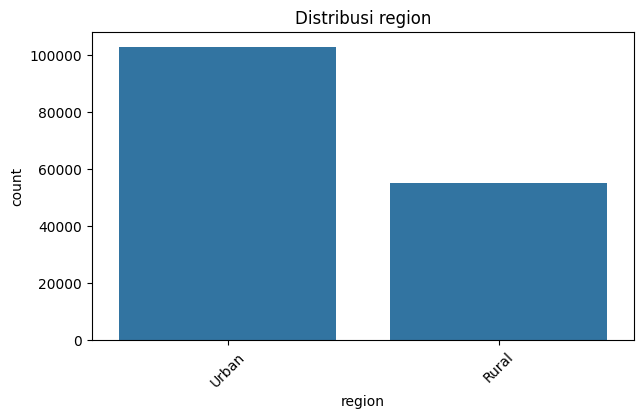

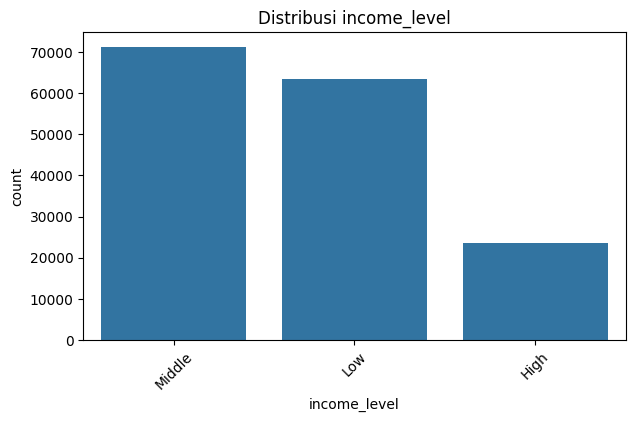

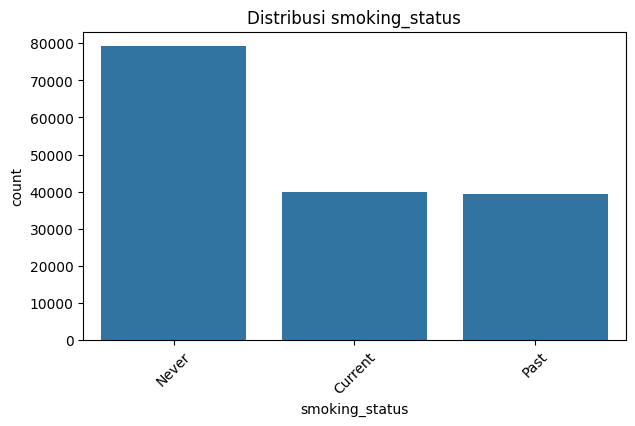

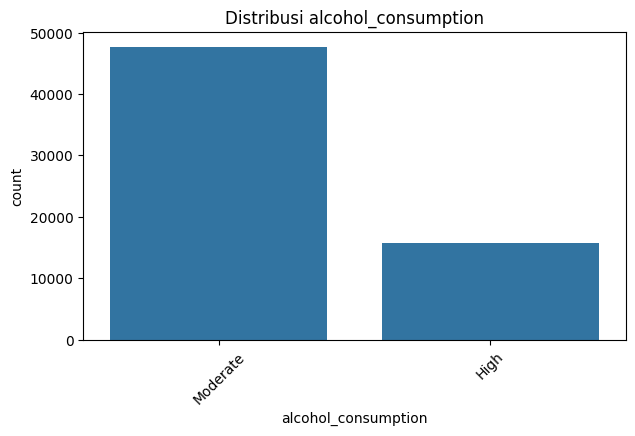

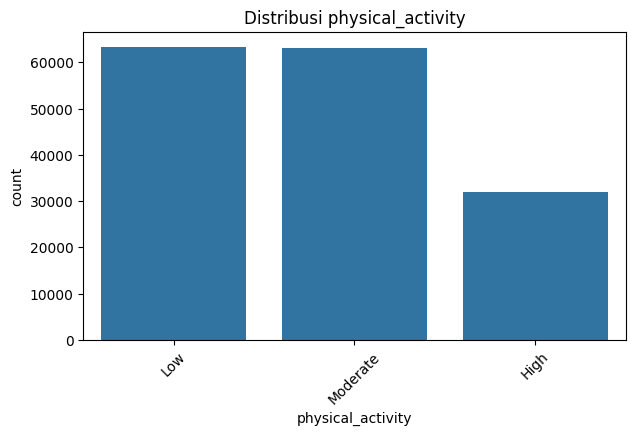

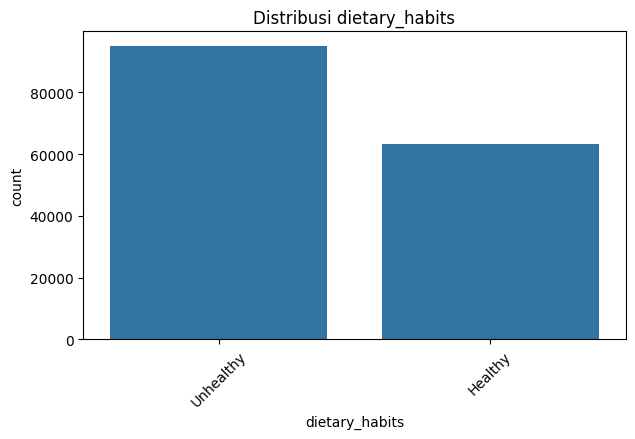

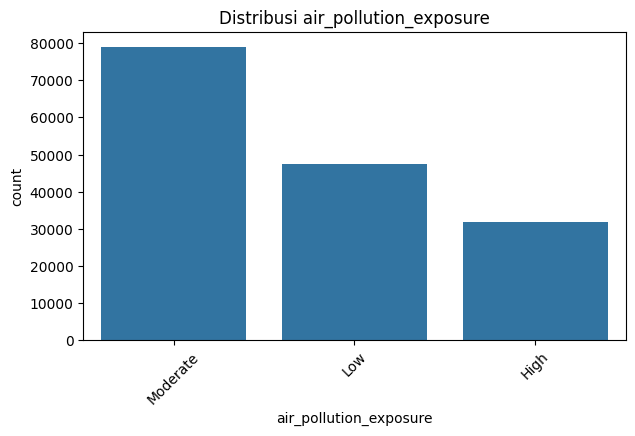

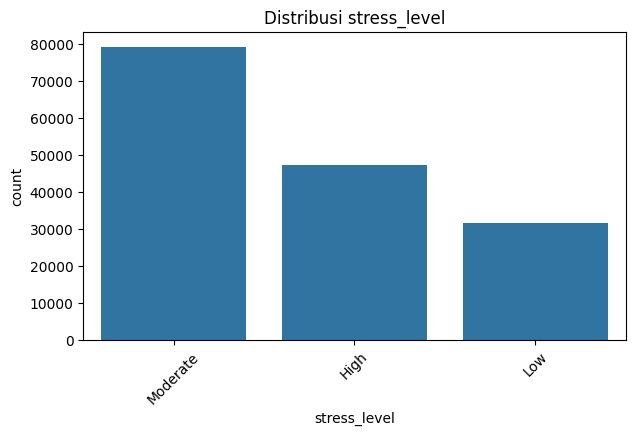

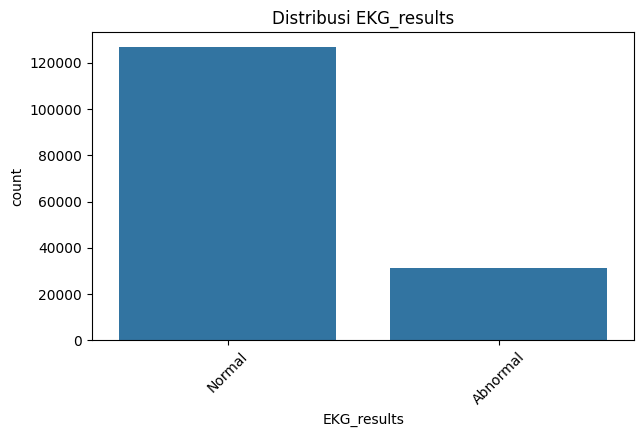

In [8]:
kategorikal = ["gender", "region", "income_level", "smoking_status", "alcohol_consumption", 
            "physical_activity", "dietary_habits", "air_pollution_exposure", 
            "stress_level", "EKG_results"]

for col in kategorikal:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()

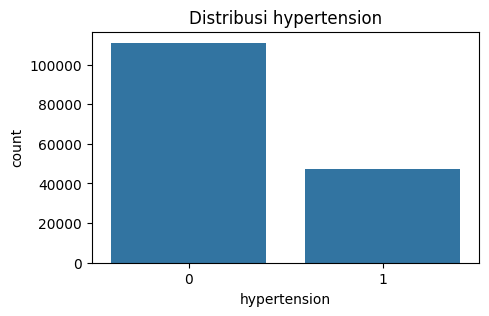

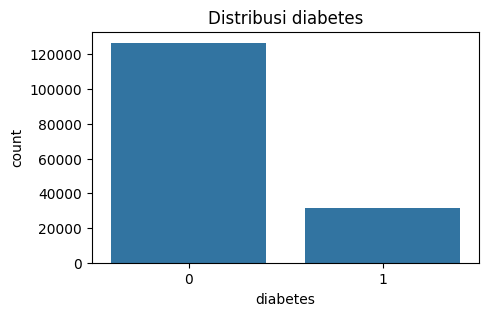

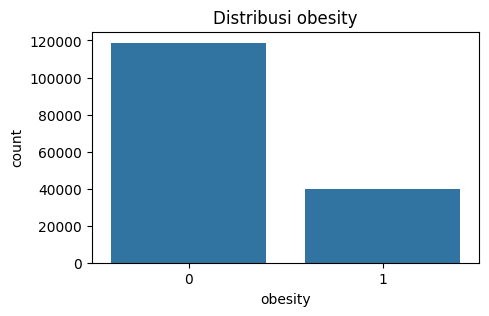

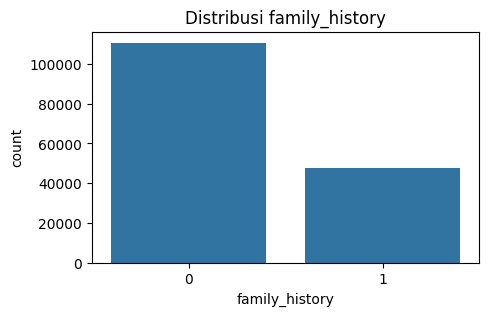

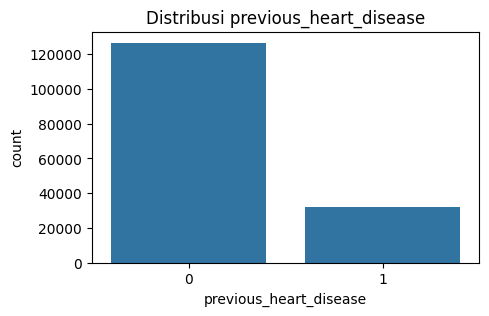

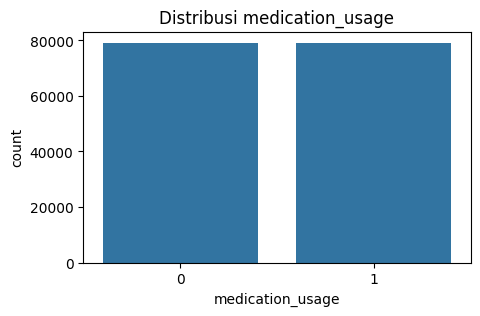

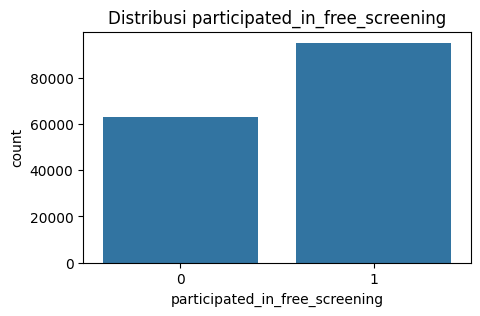

In [9]:
biner = ["hypertension", "diabetes", "obesity", "family_history", 
            "previous_heart_disease", "medication_usage", "participated_in_free_screening"]

for col in biner:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribusi {col}")
    plt.show()

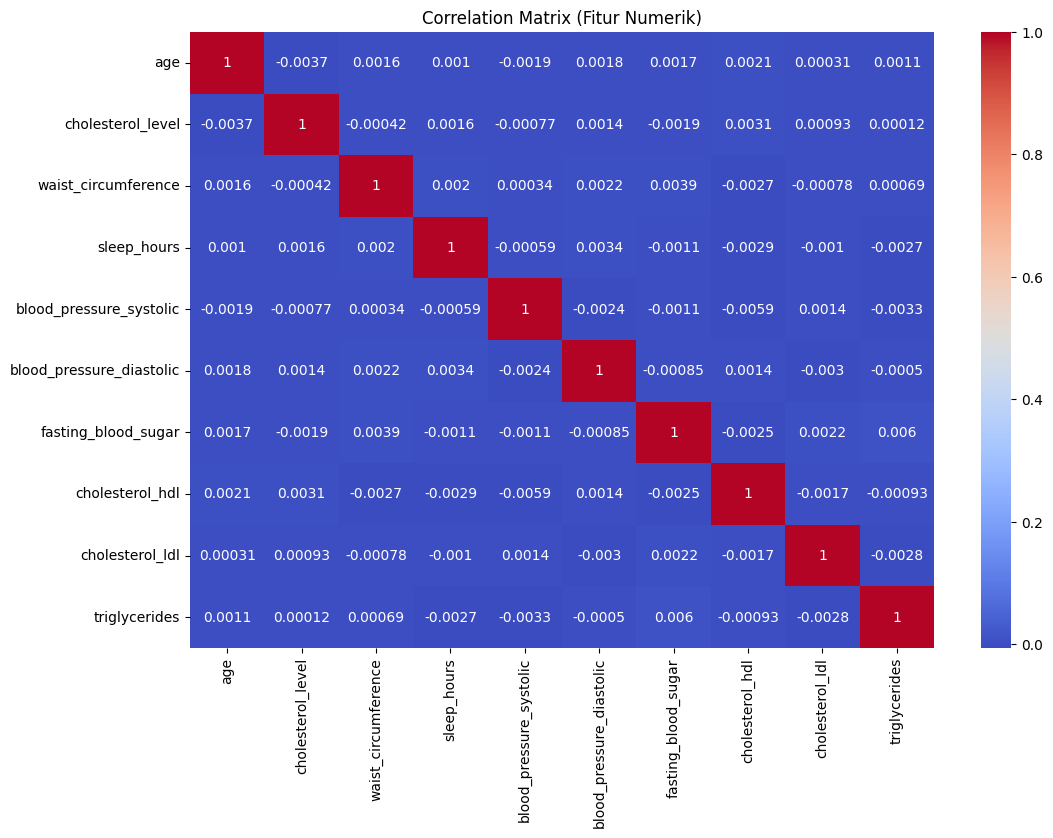

In [111]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerik].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Fitur Numerik)")
plt.show()

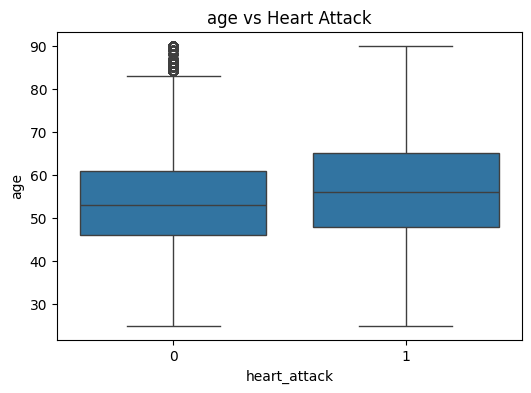

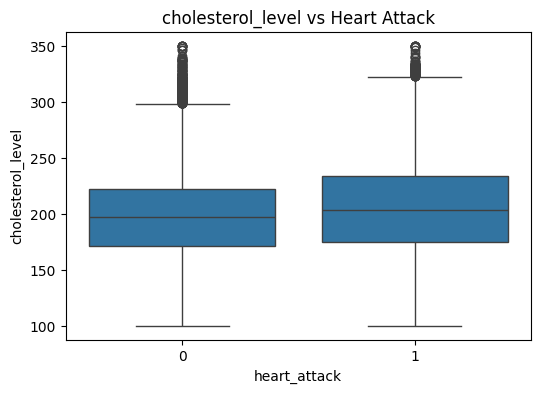

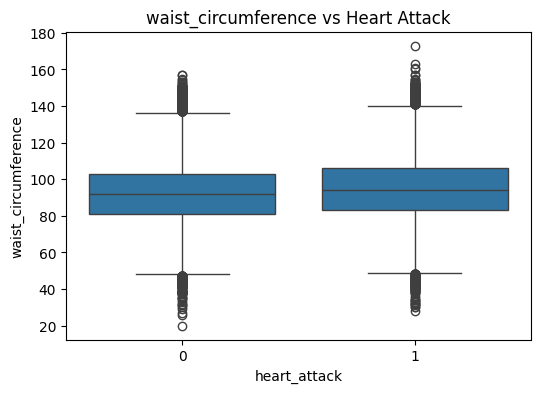

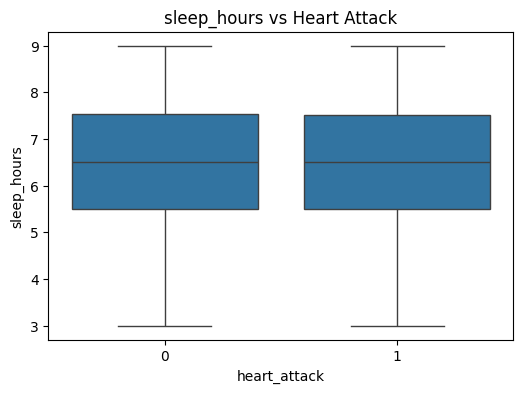

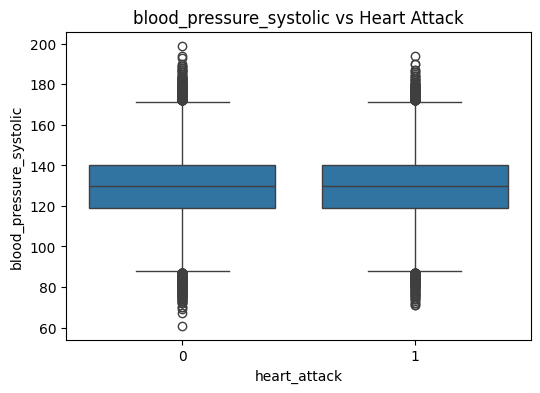

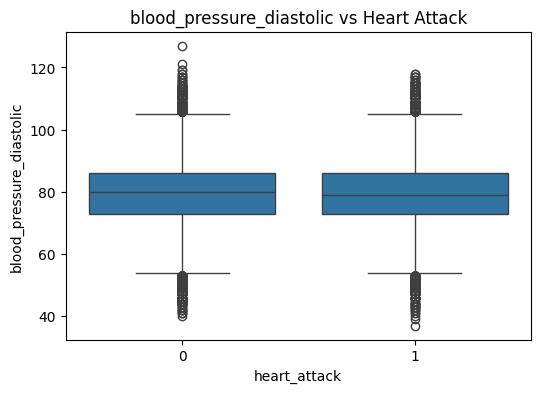

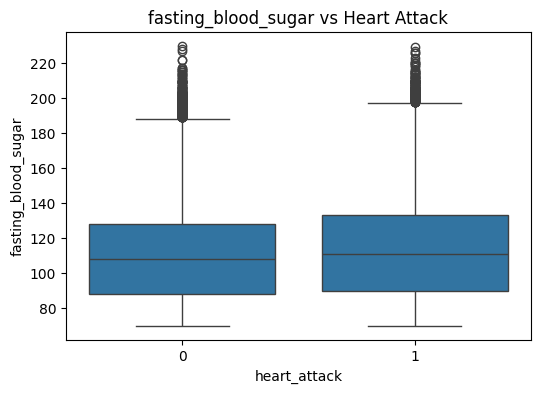

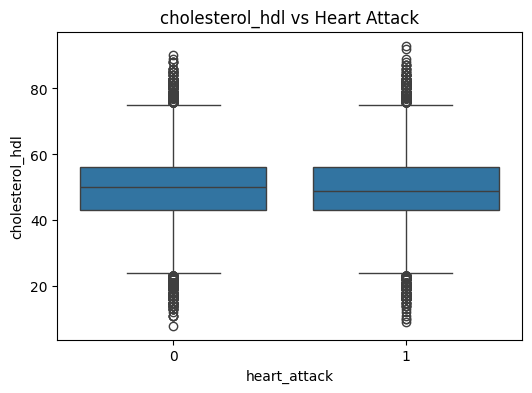

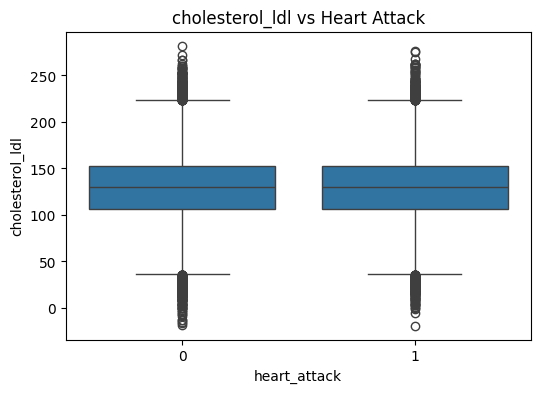

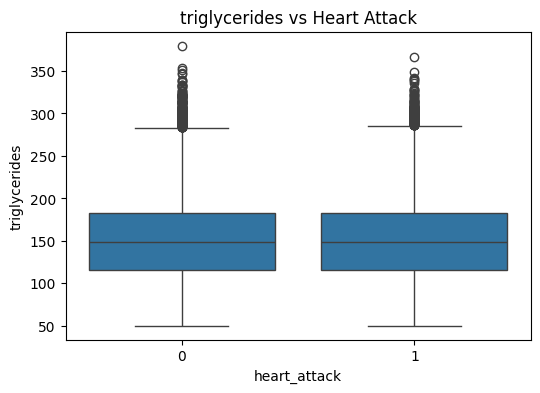

In [11]:
for col in numerik:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="heart_attack", y=col, data=df)
    plt.title(f"{col} vs Heart Attack")
    plt.show()


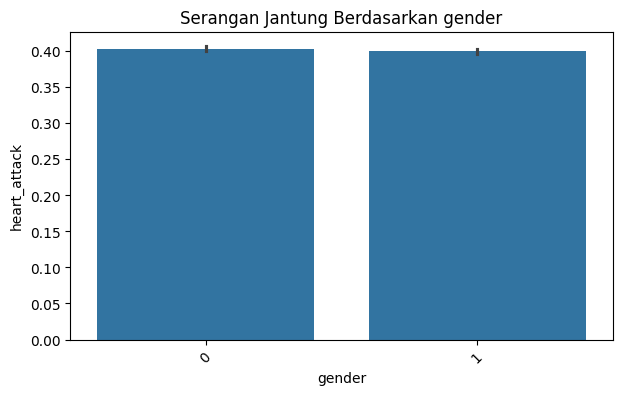

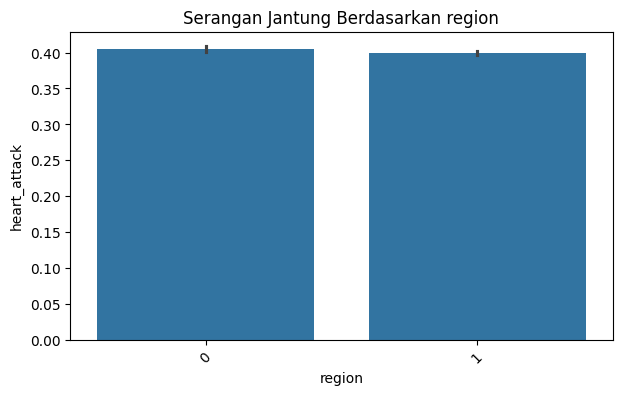

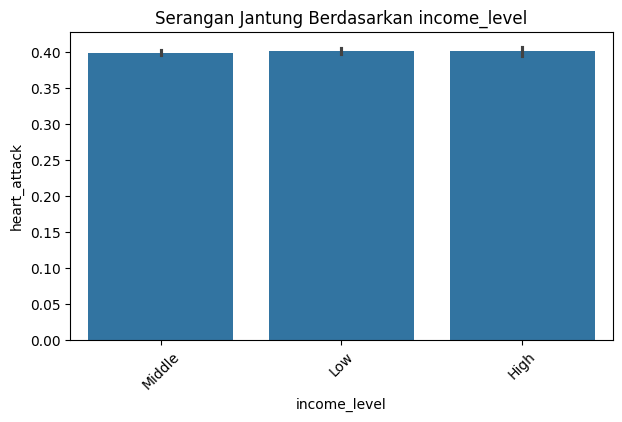

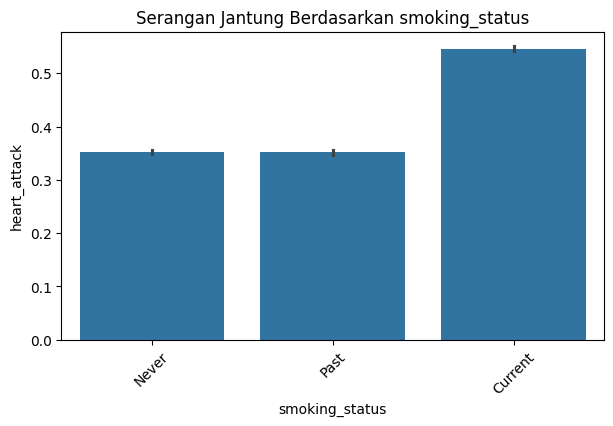

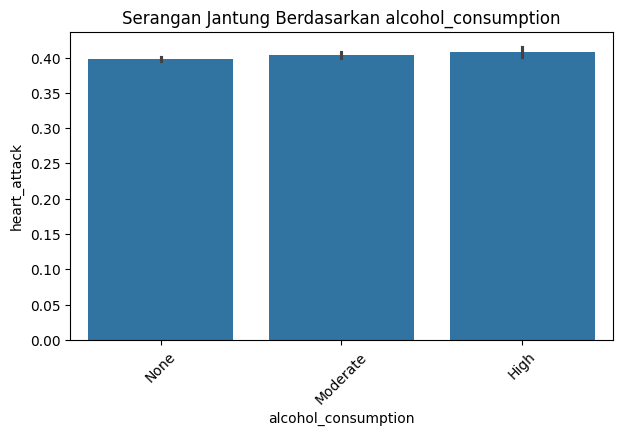

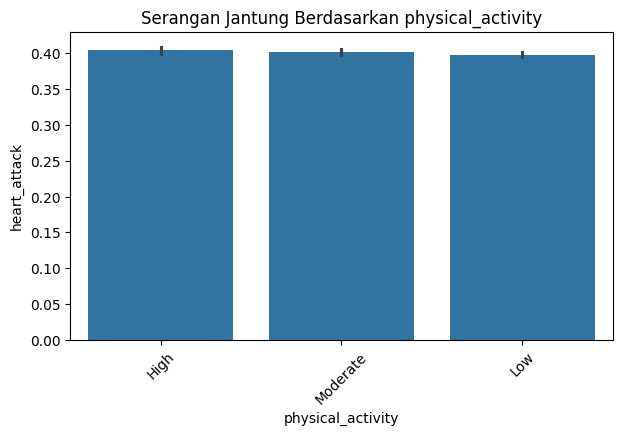

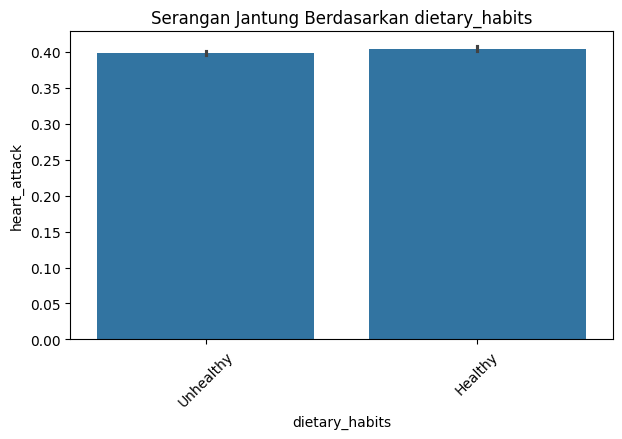

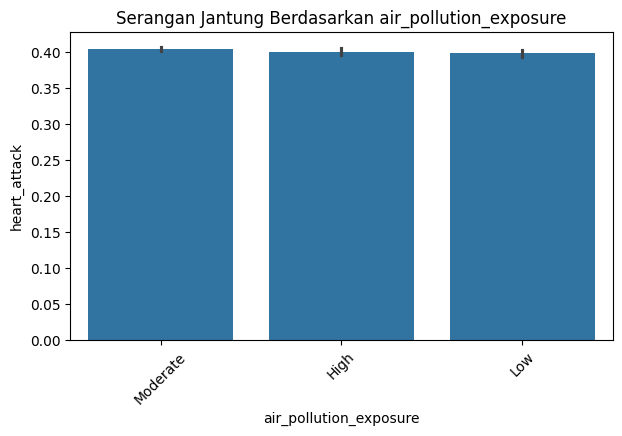

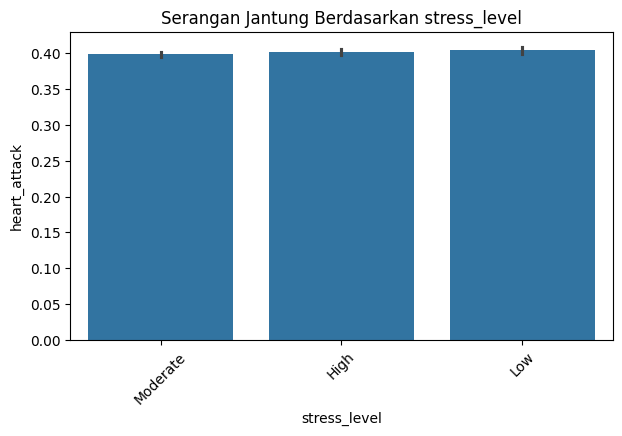

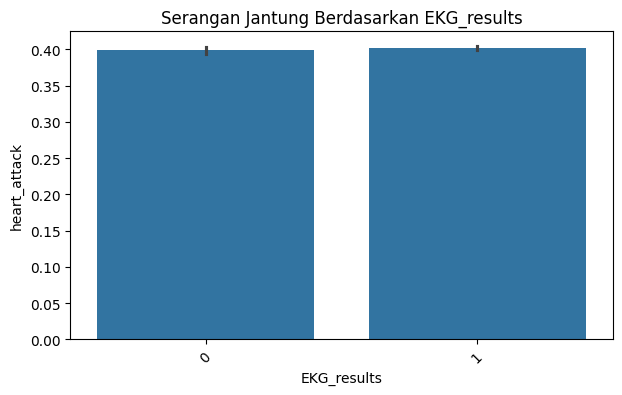

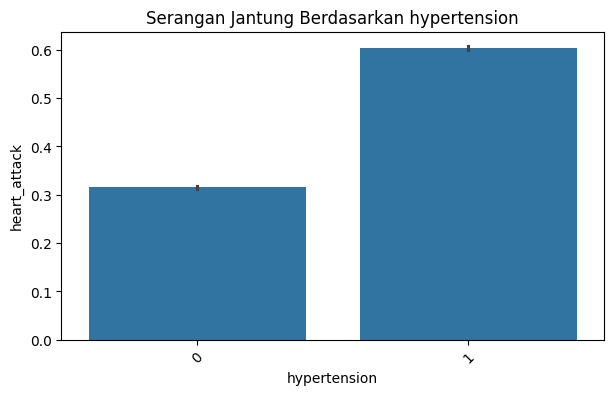

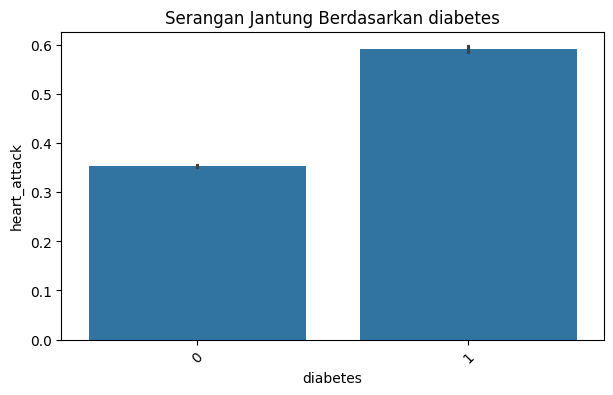

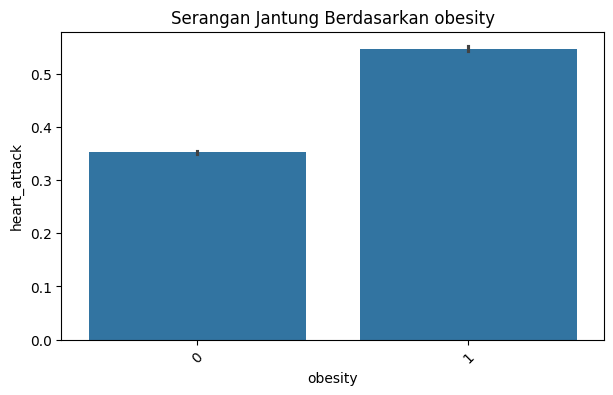

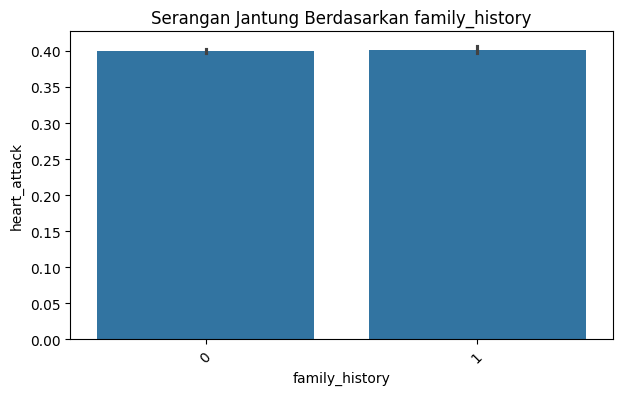

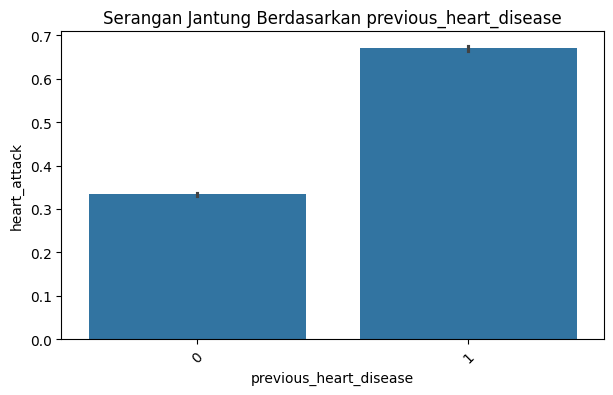

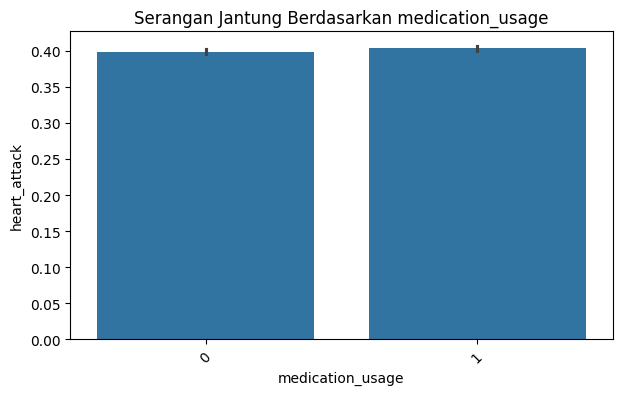

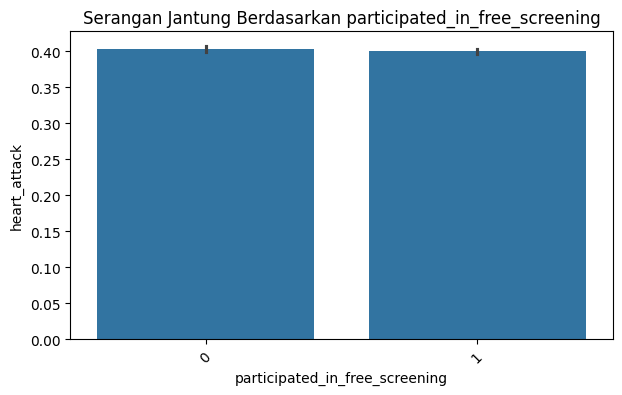

In [110]:
for col in kategorikal + biner:
    plt.figure(figsize=(7,4))
    sns.barplot(x=col, y="heart_attack", data=df)
    plt.title(f"Serangan Jantung Berdasarkan {col}")
    plt.xticks(rotation=45)
    plt.show()

In [13]:
df["alcohol_consumption"].unique()

array([nan, 'Moderate', 'High'], dtype=object)

In [14]:
df["alcohol_consumption"] = df["alcohol_consumption"].fillna("None")

In [15]:
df["alcohol_consumption"].value_counts()

alcohol_consumption
None        94848
Moderate    47725
High        15782
Name: count, dtype: int64

In [16]:
print(df.isnull().sum())

age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
alcohol_consumption               0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     0
EKG_results                       0
previous_heart_disease            0
medication_usage                  0
participated_in_free_screening    0
heart_attack                

In [17]:
kategorikal_biner = ["gender", "region", "EKG_results"]
for col in kategorikal_biner:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [18]:
kategorikal_multiclass = [
    "income_level", "smoking_status",
    "alcohol_consumption", "physical_activity",
    "dietary_habits", "air_pollution_exposure",
    "stress_level"
]
preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(handle_unknown="ignore"), kategorikal_multiclass),
        ("scale", StandardScaler(), numerik)
    ],
    remainder="passthrough"
)

In [48]:
encoded = preprocessor.fit_transform(df.drop("heart_attack", axis=1))
encoded_df = pd.DataFrame(encoded, columns=preprocessor.get_feature_names_out())
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(encoded_df.head().T)

                                                  0         1         2         3         4
ohe__income_level_High                     0.000000  0.000000  0.000000  0.000000  0.000000
ohe__income_level_Low                      0.000000  1.000000  1.000000  1.000000  0.000000
ohe__income_level_Middle                   1.000000  0.000000  0.000000  0.000000  1.000000
ohe__smoking_status_Current                0.000000  0.000000  0.000000  0.000000  1.000000
ohe__smoking_status_Never                  1.000000  0.000000  0.000000  1.000000  0.000000
ohe__smoking_status_Past                   0.000000  1.000000  1.000000  0.000000  0.000000
ohe__alcohol_consumption_High              0.000000  0.000000  0.000000  0.000000  0.000000
ohe__alcohol_consumption_Moderate          0.000000  0.000000  1.000000  1.000000  1.000000
ohe__alcohol_consumption_None              1.000000  1.000000  0.000000  0.000000  0.000000
ohe__physical_activity_High                1.000000  0.000000  0.000000  0.00000

In [20]:
y = df["heart_attack"]

X_train, X_test, y_train, y_test = train_test_split(
    encoded_df, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
model_log = LogisticRegression(max_iter=1000)
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_score_log = cross_validate(model_log, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

for metric in scoring:
    print(f"{metric}: {cv_score_log[f"test_{metric}"].mean():.4f} (+/- {cv_score_log[f"test_{metric}"].std():.4f})")

accuracy: 0.7314 (+/- 0.0030)
precision: 0.6957 (+/- 0.0042)
recall: 0.5872 (+/- 0.0055)
f1: 0.6368 (+/- 0.0046)


In [22]:
df.shape

(158355, 28)

In [23]:
encoded_df.shape

(158355, 40)

In [24]:
y.shape

(158355,)

In [25]:
print(encoded_df.columns)

Index(['ohe__income_level_High', 'ohe__income_level_Low',
       'ohe__income_level_Middle', 'ohe__smoking_status_Current',
       'ohe__smoking_status_Never', 'ohe__smoking_status_Past',
       'ohe__alcohol_consumption_High', 'ohe__alcohol_consumption_Moderate',
       'ohe__alcohol_consumption_None', 'ohe__physical_activity_High',
       'ohe__physical_activity_Low', 'ohe__physical_activity_Moderate',
       'ohe__dietary_habits_Healthy', 'ohe__dietary_habits_Unhealthy',
       'ohe__air_pollution_exposure_High', 'ohe__air_pollution_exposure_Low',
       'ohe__air_pollution_exposure_Moderate', 'ohe__stress_level_High',
       'ohe__stress_level_Low', 'ohe__stress_level_Moderate', 'scale__age',
       'scale__cholesterol_level', 'scale__waist_circumference',
       'scale__sleep_hours', 'scale__blood_pressure_systolic',
       'scale__blood_pressure_diastolic', 'scale__fasting_blood_sugar',
       'scale__cholesterol_hdl', 'scale__cholesterol_ldl',
       'scale__triglycerides', 'rem

In [26]:
model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
cv_score_rf = cross_validate(model_rf, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1, verbose=2)

for metric in scoring:
    print(f"{metric}: {cv_score_rf[f"test_{metric}"].mean():.4f} (+/- {cv_score_rf[f"test_{metric}"].std():.4f})")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   15.9s remaining:   10.6s


accuracy: 0.7316 (+/- 0.0025)
precision: 0.6930 (+/- 0.0043)
recall: 0.5938 (+/- 0.0045)
f1: 0.6396 (+/- 0.0035)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.3s finished


In [27]:
model_knn = KNeighborsClassifier(n_jobs=-1)  
cv_score_knn = cross_validate(model_knn, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1, verbose=2)

for metric in scoring:
    print(f"{metric}: {cv_score_knn[f"test_{metric}"].mean():.4f} (+/- {cv_score_knn[f"test_{metric}"].std():.4f})")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   11.9s remaining:    7.9s


accuracy: 0.6399 (+/- 0.0017)
precision: 0.5881 (+/- 0.0043)
recall: 0.3408 (+/- 0.0044)
f1: 0.4315 (+/- 0.0034)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.1s finished


In [28]:
voting_hard = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000, random_state=42)),
        ("rf", RandomForestClassifier(random_state=42, n_jobs=-1)),
        ("knn", KNeighborsClassifier(n_jobs=-1))
    ],
    voting="hard"
)
cv_score_vh = cross_validate(voting_hard, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1, verbose=1)

for metric in scoring:
    print(f"{metric}: {cv_score_vh[f"test_{metric}"].mean():.4f} (+/- {cv_score_vh[f"test_{metric}"].std():.4f})")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


accuracy: 0.7312 (+/- 0.0021)
precision: 0.7072 (+/- 0.0037)
recall: 0.5628 (+/- 0.0052)
f1: 0.6268 (+/- 0.0036)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.7s finished


In [29]:
X_train.shape

(126684, 40)

In [30]:
y_train.shape

(126684,)

In [31]:
X_test.shape

(31671, 40)

In [32]:
y_test.shape

(31671,)

In [33]:
stacking = StackingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000, random_state=42)),
        ("rf", RandomForestClassifier(random_state=42, n_jobs=-1)),
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_jobs=-1
)
cv_score_st = cross_validate(stacking, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1, verbose=2)

for metric in scoring:
    print(f"{metric}: {cv_score_st[f"test_{metric}"].mean():.4f} (+/- {cv_score_st[f"test_{metric}"].std():.4f})")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


accuracy: 0.7337 (+/- 0.0025)
precision: 0.6911 (+/- 0.0035)
recall: 0.6075 (+/- 0.0042)
f1: 0.6466 (+/- 0.0035)


<h3>Tunning</h3>

In [49]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    "n_estimators": [300, 400],
    "max_depth": [20, 40],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1],
    "max_features": ["sqrt"],
}
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    verbose=2,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best Parameters:", rf_grid.best_params_)
print("Best F1 Score (CV inside GridSearch):", rf_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best F1 Score (CV inside GridSearch): 0.6484367861945922


In [51]:
best_rf = rf_grid.best_estimator_
cv_results = cross_validate(
    best_rf,
    X_train, y_train, 
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    verbose=2
)

for metric in scoring:
    print(f"{metric}: {cv_results[f"test_{metric}"].mean():.4f} (+/- {cv_results[f"test_{metric}"].std():.4f})")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   45.7s remaining:   30.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.9s finished


accuracy: 0.7357 (+/- 0.0029)
precision: 0.6950 (+/- 0.0038)
recall: 0.6077 (+/- 0.0051)
f1: 0.6484 (+/- 0.0043)


<h3>Stacking</h3>

In [52]:
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
stacking = StackingClassifier(
    estimators=[
        ("lr", lr),
        ("rf", rf)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_jobs=-1
)
param_grid_stacking = {
    "rf__n_estimators": [100, 300],
    "rf__max_depth": [20, 40],
    "final_estimator__C": [1, 10],
    "final_estimator__penalty": ["l2"]
}
grid_stacking = GridSearchCV(
    estimator=stacking,
    param_grid=param_grid_stacking,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)
grid_stacking.fit(X_train, y_train)

print("Best Parameters Stacking:", grid_stacking.best_params_)
print("Best F1 Score Stacking:", grid_stacking.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters Stacking: {'final_estimator__C': 1, 'final_estimator__penalty': 'l2', 'rf__max_depth': 20, 'rf__n_estimators': 300}
Best F1 Score Stacking: 0.6527264852242615


In [53]:
best_stacking = grid_stacking.best_estimator_
cv_score_stacking = cross_validate(best_stacking, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1, verbose=2)

for metric in scoring:
    print(f"{metric}: {cv_score_stacking[f'test_{metric}'].mean():.4f} (+/- {cv_score_stacking[f'test_{metric}'].std():.4f})")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  4.6min remaining:  3.0min


accuracy: 0.7368 (+/- 0.0031)
precision: 0.6930 (+/- 0.0042)
recall: 0.6169 (+/- 0.0053)
f1: 0.6527 (+/- 0.0044)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.6min finished


<h1>Tunning(PCA)</h1>

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [48]:
print("Dimensi asli:", X_train.shape[1])
print("Dimensi setelah PCA:", X_train_pca.shape[1])

Dimensi asli: 40
Dimensi setelah PCA: 28


<h3>Random Forest</h3>

In [49]:
rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid_rf_pca = {
    "n_estimators": [100, 300],
    "max_depth": [None, 20, 40],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
}
rf_grid_pca = GridSearchCV(
    estimator=rf_pca,
    param_grid=param_grid_rf_pca,
    cv=5,
    scoring="f1",
    verbose=2,
    n_jobs=-1
)
rf_grid_pca.fit(X_train_pca, y_train)

print("Best Parameters:", rf_grid_pca.best_params_)
print("Best F1 Score (CV inside GridSearch):", rf_grid_pca.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best F1 Score (CV inside GridSearch): 0.5477474814931089


In [50]:
best_rf_pca = rf_grid_pca.best_estimator_
cv_results_rf_pca = cross_validate(
    best_rf_pca,
    X_train_pca,
    y_train,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    verbose=2
)
for metric in scoring:
    print(f"{metric}: {cv_results_rf_pca[f"test_{metric}"].mean():.4f} (+/- {cv_results_rf_pca[f"test_{metric}"].std():.4f})")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.6min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished


accuracy: 0.6816 (+/- 0.0024)
precision: 0.6364 (+/- 0.0045)
recall: 0.4808 (+/- 0.0020)
f1: 0.5477 (+/- 0.0029)


<h3>Stacking</h3>

In [51]:
stacking_pca = StackingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000, random_state=42)),
        ("rf", RandomForestClassifier(random_state=42, n_jobs=-1))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_jobs=-1
)
param_grid_stacking_pca = {
    "rf__n_estimators": [100, 300],
    "rf__max_depth": [None, 20],
    "final_estimator__C": [0.1, 1, 10]
}
stacking_grid_pca = GridSearchCV(
    estimator=stacking_pca,
    param_grid=param_grid_stacking_pca,
    cv=5,
    scoring="f1",
    verbose=2,
    n_jobs=-1
)
stacking_grid_pca.fit(X_train_pca, y_train)

print("Best Parameters:", stacking_grid_pca.best_params_)
print("Best F1 Score (CV inside GridSearch):", stacking_grid_pca.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'final_estimator__C': 10, 'rf__max_depth': 20, 'rf__n_estimators': 300}
Best F1 Score (CV inside GridSearch): 0.5530044280385339


In [52]:
best_stacking_pca = stacking_grid_pca.best_estimator_
cv_results_stacking_pca = cross_validate(
    best_stacking_pca,
    X_train_pca,
    y_train,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    verbose=2
)
for metric in scoring:
    print(f"{metric}: {cv_results_stacking_pca[f"test_{metric}"].mean():.4f} (+/- {cv_results_stacking_pca[f"test_{metric}"].std():.4f})")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 19.6min remaining: 13.1min


accuracy: 0.6804 (+/- 0.0024)
precision: 0.6297 (+/- 0.0045)
recall: 0.4930 (+/- 0.0017)
f1: 0.5530 (+/- 0.0024)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 19.9min finished


<h2>Resampling</h2>

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [59]:
rf_balanced = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
)
param_grid_balanced = {
    "n_estimators": [300],
    "max_depth": [20, 40],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1],
    "max_features": ["sqrt"],
}
rf_grid_balanced = GridSearchCV(
    estimator=rf_balanced,
    param_grid=param_grid_balanced,
    cv=5,
    scoring="f1",  
    verbose=2,
    n_jobs=-1
)
rf_grid_balanced.fit(X_train_res, y_train_res)

print("Best Parameters:", rf_grid_balanced.best_params_)
print("Best F1 Score (CV inside GridSearch):", rf_grid_balanced.best_score_)

best_rf_balanced = rf_grid_balanced.best_estimator_
cv_results_balanced = cross_validate(
    best_rf_balanced,
    X_train_res, y_train_res,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    verbose=2
)

for metric in scoring:
    print(f"{metric}: {cv_results_balanced[f'test_{metric}'].mean():.4f} (+/- {cv_results_balanced[f'test_{metric}'].std():.4f})")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 Score (CV inside GridSearch): 0.7608558204855987


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   59.0s remaining:   39.3s


accuracy: 0.7755 (+/- 0.0639)
precision: 0.7893 (+/- 0.0078)
recall: 0.7490 (+/- 0.1611)
f1: 0.7609 (+/- 0.0852)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.4s finished


In [63]:
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
stacking_res = StackingClassifier(
    estimators=[
        ("lr", lr),
        ("rf", rf)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_jobs=-1
)
param_grid_stacking_res = {
    "rf__n_estimators": [100, 300],
    "rf__max_depth": [20, 40],
    "final_estimator__C": [1, 10],
    "final_estimator__penalty": ["l2"]
}
grid_stacking_res = GridSearchCV(
    estimator=stacking_res,
    param_grid=param_grid_stacking_res,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)
grid_stacking_res.fit(X_train_res, y_train_res)

print("Best Parameters Stacking:", grid_stacking_res.best_params_)
print("Best F1 Score Stacking:", grid_stacking_res.best_score_)

best_stacking_res = grid_stacking_res.best_estimator_
cv_score_stacking_res = cross_validate(best_stacking_res, X_train_res, y_train_res, cv=5, scoring=scoring, n_jobs=-1, verbose=2)

for metric in scoring:
    print(f"{metric}: {cv_score_stacking_res[f'test_{metric}'].mean():.4f} (+/- {cv_score_stacking_res[f'test_{metric}'].std():.4f})")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters Stacking: {'final_estimator__C': 10, 'final_estimator__penalty': 'l2', 'rf__max_depth': 40, 'rf__n_estimators': 300}
Best F1 Score Stacking: 0.7663632184560243


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  7.1min remaining:  4.8min


accuracy: 0.7758 (+/- 0.0592)
precision: 0.7803 (+/- 0.0082)
recall: 0.7653 (+/- 0.1500)
f1: 0.7664 (+/- 0.0775)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.2min finished


<h2>Evaluasi</h2>

In [87]:
y_pred = best_stacking_res.predict(X_test)
y_proba = best_stacking_res.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     18971
           1       0.67      0.64      0.65     12700

    accuracy                           0.73     31671
   macro avg       0.72      0.71      0.72     31671
weighted avg       0.73      0.73      0.73     31671



In [81]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"f1: {f1:.4f}")

accuracy: 0.7294
precision: 0.6710
recall: 0.6380
f1: 0.6541


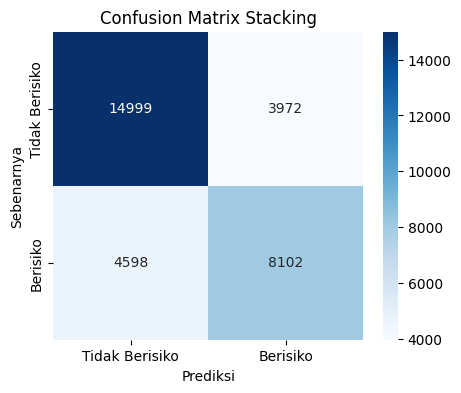

In [101]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Berisiko", "Berisiko"], yticklabels=["Tidak Berisiko", "Berisiko"])
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.title("Confusion Matrix Stacking")
plt.show()

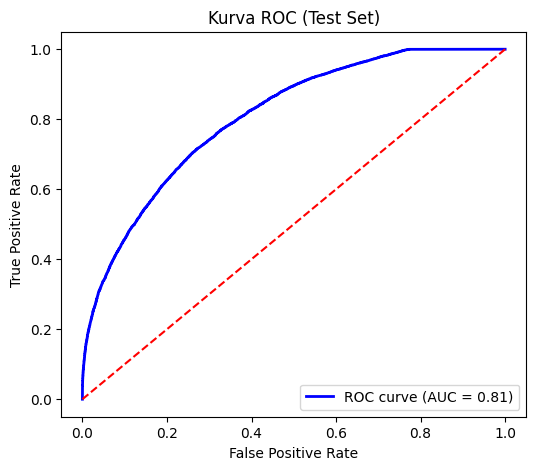

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC (Test Set)")
plt.legend(loc="lower right")
plt.show()


Top 10 Features dari RandomForest (Base Learner):
                                 Fitur  Kontribusi
32            remainder__hypertension    0.092666
37  remainder__previous_heart_disease    0.086122
21           scale__cholesterol_level    0.062225
20                         scale__age    0.059272
26         scale__fasting_blood_sugar    0.052559
33                remainder__diabetes    0.049947
23                 scale__sleep_hours    0.048536
29               scale__triglycerides    0.047522
28             scale__cholesterol_ldl    0.047349
22         scale__waist_circumference    0.045869


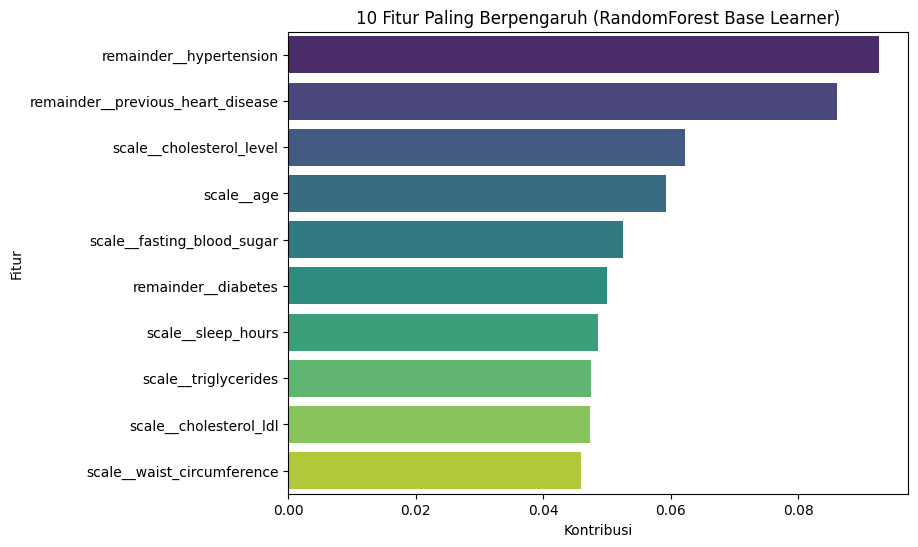

In [109]:
rf_model = best_stacking_res.named_estimators_["rf"]
feature_names = preprocessor.get_feature_names_out()
rf_importances = pd.DataFrame({
    "Fitur": feature_names,
    "Kontribusi": rf_model.feature_importances_
}).sort_values("Kontribusi", ascending=False)
top10_features = rf_importances.head(10)
print("\nTop 10 Features dari RandomForest (Base Learner):\n", top10_features)

plt.figure(figsize=(8,6))
sns.barplot(x="Kontribusi", y="Fitur", data=top10_features, palette="viridis", hue="Fitur")
plt.title("10 Fitur Paling Berpengaruh (RandomForest Base Learner)")
plt.show()

In [92]:
y_pred_rf = best_rf_balanced.predict(X_test)
y_proba_rf = best_rf_balanced.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_biasa))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     18971
           1       0.68      0.63      0.65     12700

    accuracy                           0.73     31671
   macro avg       0.72      0.71      0.72     31671
weighted avg       0.73      0.73      0.73     31671



In [94]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"f1: {f1:.4f}")

accuracy: 0.7312
precision: 0.6790
recall: 0.6253
f1: 0.6510


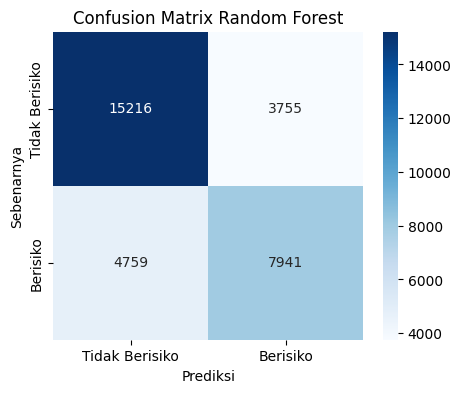

In [100]:
cm = confusion_matrix(y_test, y_pred_biasa)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Berisiko", "Berisiko"], yticklabels=["Tidak Berisiko", "Berisiko"])
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.title("Confusion Matrix Random Forest")
plt.show()

<h2>Fix: Stacking pakai data resampling</h2>

In [113]:
import pickle
with open("model/best_stacking_res.pkl", "wb") as f:
    pickle.dump(best_stacking_res, f)

with open("model/preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

In [114]:
label_encoders = {}
kategorikal_biner = ["gender", "region", "EKG_results"]
for col in kategorikal_biner:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    classes = list(le.classes_)
    mapping = {str(cls): int(idx) for idx, cls in enumerate(classes)}
    label_encoders[col] = {"classes": classes, "mapping": mapping}

with open("model/label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)